In [4]:
from tensorflow.keras.datasets import cifar10

(train_images, train_targets), (test_images, test_targets) = cifar10.load_data()

# 타겟 데이터의 dimension은 1로 맞춰준다. # squeeze()
# one-hot encoding의 적용 여부를 판단하기 편하다.
print(train_images.shape, train_targets.squeeze().shape)
print(test_images.shape, test_targets.squeeze().shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


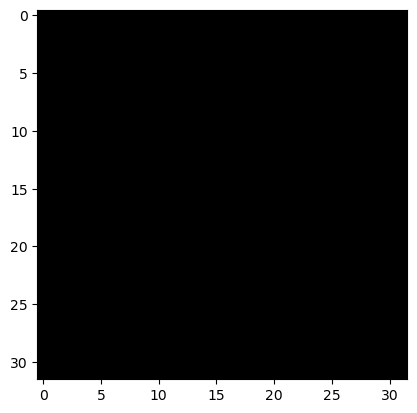

In [51]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0])
plt.show()

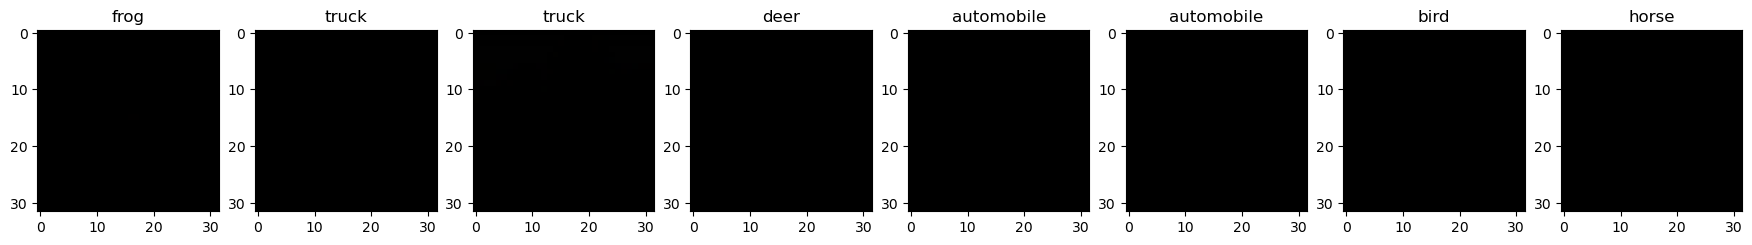

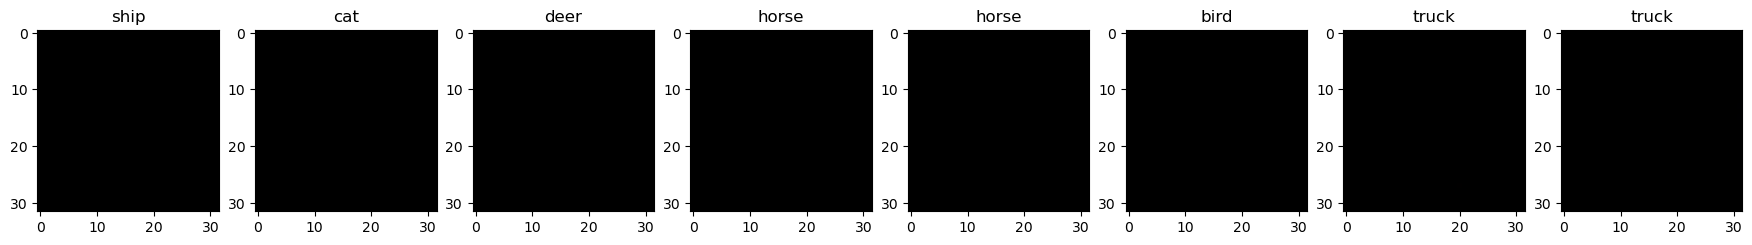

In [46]:
import matplotlib.pyplot as plt
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


def show_images(images, targets, ncols=8):
    fig, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axes[i].imshow(images[i])
        target = targets[i].squeeze()
        axes[i].set_title(class_names[int(target)])

show_images(train_images[:8], train_targets[:8])
show_images(train_images[8:16], train_targets[8:16])

In [10]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)


print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

In [14]:
train_images

array([[[[0.00090734, 0.00095348, 0.00096886],
         [0.00066128, 0.00070742, 0.00069204],
         [0.00076894, 0.00073818, 0.00066128],
         ...,
         [0.00242983, 0.00202999, 0.0016609 ],
         [0.00233756, 0.00192234, 0.00156863],
         [0.00227605, 0.00190696, 0.00158401]],

        [[0.00024606, 0.00030757, 0.00030757],
         [0.        , 0.        , 0.        ],
         [0.00027682, 0.00012303, 0.        ],
         ...,
         [0.00189158, 0.00135333, 0.00084583],
         [0.00183007, 0.00127643, 0.00076894],
         [0.0018762 , 0.00133795, 0.00087659]],

        [[0.00038447, 0.00036909, 0.00032295],
         [0.00024606, 0.00010765, 0.        ],
         [0.00075356, 0.00041522, 0.00012303],
         ...,
         [0.00181469, 0.00129181, 0.00076894],
         [0.00184544, 0.00129181, 0.00076894],
         [0.00167628, 0.00112265, 0.00064591]],

        ...,

        [[0.00319877, 0.00261438, 0.00147636],
         [0.00309112, 0.00235294, 0.00052288]

In [13]:
train_targets = train_targets.squeeze()
test_targets = test_targets.squeeze()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, Input, Activation
from tensorflow.keras.callbacks import Callback

INPUT_SIZE = 32

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 3))

# padding default == valid
x = Conv2D(filters = 32, kernel_size=5, padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters = 32, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters = 64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters = 64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters = 128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters = 128, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten(name='classifier_A00_Flatten')(x)
x = Dropout(name='classifierA_DropOut01', rate=0.5)(x)
x = Dense(300, activation='relu', name='classifierAD01')(x)
x = Dropout(name='classifierA_DropOut02', rate=0.5)(x)
output = Dense(10, activation='softmax', name='output')(x)


model = Model(inputs = input_tensor, outputs = output)
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier_A00_Flatten          │ (None, 1152)           │             0 │
│ (Flatten)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifierA_DropOut01 (Dropout) │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifierAD01 (Dense)          │ (None, 300)            │       345,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifierA_DropOut02 (Dropout) │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 637,454 (2.43 MB)

 Trainable params: 637,454 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import CategoricalCrossentropy
# 내가 원=핫 인코딩을 하지않고 함수 내부적으로 원-핫 인코딩을 시켜준다.
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics = ['acc'])

In [33]:
history = model.fit(x=train_images,
                    y=train_targets, 
                    batch_size=128,
                    epochs=20,
                    validation_split=0.2)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 132ms/step - acc: 0.0973 - loss: 2.3031 - val_acc: 0.0980 - val_loss: 2.3027
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 143ms/step - acc: 0.1011 - loss: 2.3026 - val_acc: 0.0997 - val_loss: 2.3027
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 163ms/step - acc: 0.1006 - loss: 2.3028 - val_acc: 0.0997 - val_loss: 2.3027
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step - acc: 0.0993 - loss: 2.3026 - val_acc: 0.0952 - val_loss: 2.3028
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 156ms/step - acc: 0.0982 - loss: 2.3027 - val_acc: 0.0952 - val_loss: 2.3028
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 158ms/step - acc: 0.1011 - loss: 2.3027 - val_acc: 0.0952 - val_loss: 2.3027
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 159ms/step - acc: 0.0991 - loss: 2.3027 - val_acc: 0.0952 - val_loss: 2.3028
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step - acc: 0.1004 - loss: 2.3027 - val_acc: 0.0952 - val_loss: 2.3028
Epoch 9/20
313/313 ━━━━━━━━━━━━━

In [35]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_targets, batch_size=128, verbose=1)

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - acc: 0.1135 - loss: 2.3026


[2.3026559352874756, 0.1103999987244606]

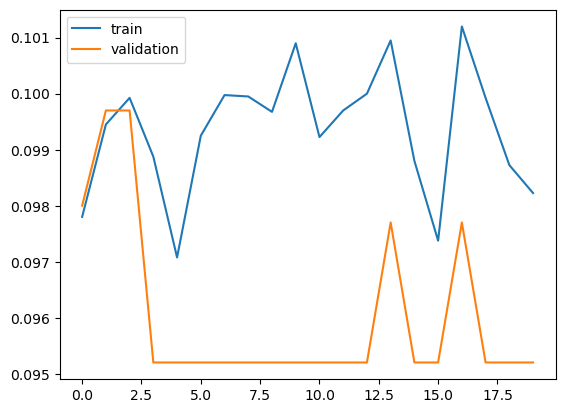

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[2 7 2 2 2 7 2 2]


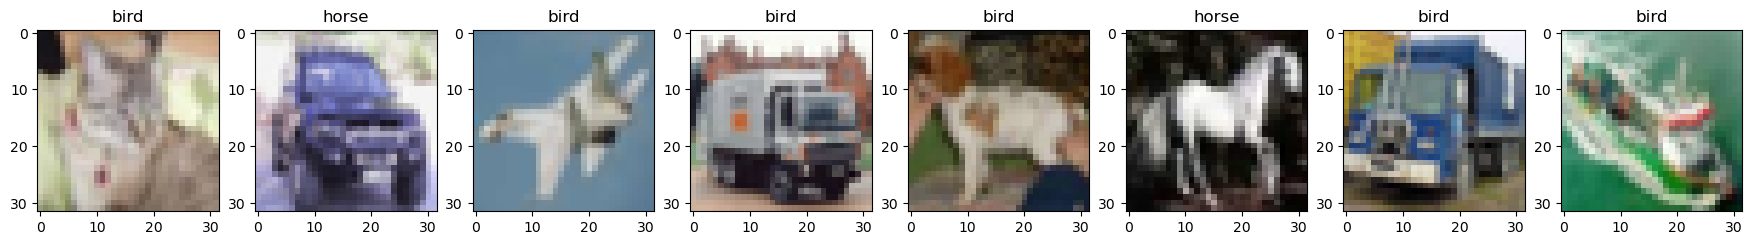

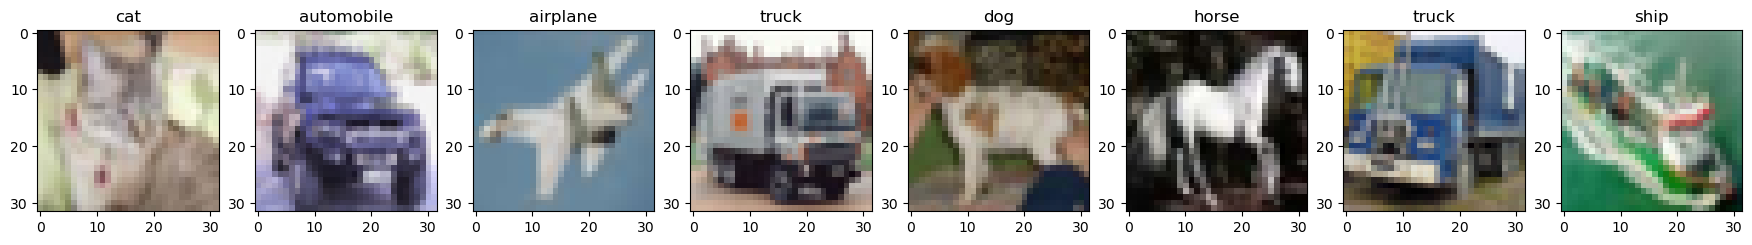

In [49]:
pred_probas = model.predict(test_images[8:16], batch_size=128)
pred_classes = np.argmax(pred_probas.squeeze(), axis=1)
print(pred_classes)

show_images(test_images[8:16], pred_classes)
show_images(test_images[8:16], test_targets[8:16])

In [ ]:
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']